In [47]:
import pickle
import numpy as np
import random

from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
with open('train_image.pkl', 'rb') as f:
    X = np.array(pickle.load(f))
    
with open('train_label.pkl', 'rb') as f:
    Y = np.array(pickle.load(f))

X = X/255

In [4]:
x_train, x_val, y_train, y_val = train_test_split(X, Y)

## Data Exploration

Now, let's look at what we've got here.

In [187]:
print("Dimensions of training data: ")
print(x_train.shape)
print(y_train.shape)

print("Dimensions of validation data: ")
print(x_val.shape)
print(y_val.shape)

Dimensions of training data: 
(6000, 784)
(6000,)
Dimensions of validation data: 
(2000, 784)
(2000,)


`784`, interesting - That is a (28, 28) image. Let's look at some of these below.

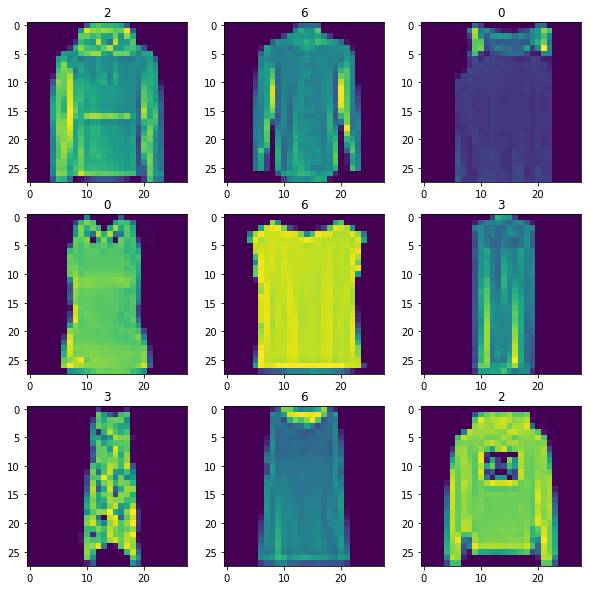

In [36]:
random_index = np.random.randint(0, 2001, size=(3, 3))

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        axes[i][j].imshow(x_train[random_index[i][j]].reshape(28, 28))
        axes[i][j].title.set_text(y_train[random_index[i][j]])

#### Fashion MNIST

Ah, the classic Fashion MNIST set. This is gonna be interesting. Let's try some basic machine learning techniques first.

Let's first create a helper function so that we can assess the performance of a model easily.

In [39]:
def evaluate_model(model):
    y_pred = model.predict(x_val)
    print("Classifciation Report:")
    print(classification_report(y_val, y_pred))
    print("Confusion Matrix:\n")
    print(confusion_matrix(y_val, y_pred))
    print("\nAccuracy of the model on validation set: {}".format(
        model.score(x_val, y_val)))

#### Let's try SVM first

In [40]:
SVC = svm.SVC(gamma='scale').fit(x_train, y_train)
evaluate_model(SVC)

Classifciation Report:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       471
           2       0.88      0.87      0.87       522
           3       0.90      0.93      0.92       489
           6       0.75      0.68      0.71       518

   micro avg       0.83      0.83      0.83      2000
   macro avg       0.83      0.83      0.83      2000
weighted avg       0.83      0.83      0.83      2000

Confusion Matrix:

[[400   4  26  41]
 [  7 454   0  61]
 [ 13   7 457  12]
 [ 94  52  22 350]]

Accuracy of the model on validation set: 0.8305


83% accuracy on first go. We're upto a great start. Let's try some other things now

In [42]:
dtree_model = DecisionTreeClassifier(max_depth = 17).fit(x_train, y_train)
evaluate_model(dtree_model)

Classifciation Report:
              precision    recall  f1-score   support

           0       0.71      0.76      0.73       471
           2       0.82      0.80      0.81       522
           3       0.86      0.85      0.85       489
           6       0.62      0.61      0.62       518

   micro avg       0.75      0.75      0.75      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.75      0.75      0.75      2000

Confusion Matrix:

[[356  11  32  72]
 [ 13 419   9  81]
 [ 24  12 414  39]
 [108  66  27 317]]

Accuracy of the model on validation set: 0.753


In [43]:
dtree_model = DecisionTreeClassifier(max_depth=25).fit(x_train, y_train)
evaluate_model(dtree_model)

Classifciation Report:
              precision    recall  f1-score   support

           0       0.72      0.75      0.73       471
           2       0.81      0.78      0.79       522
           3       0.87      0.84      0.86       489
           6       0.59      0.61      0.60       518

   micro avg       0.74      0.74      0.74      2000
   macro avg       0.75      0.74      0.75      2000
weighted avg       0.75      0.74      0.74      2000

Confusion Matrix:

[[352  14  26  79]
 [  5 405   9 103]
 [ 28   8 413  40]
 [104  70  28 316]]

Accuracy of the model on validation set: 0.743


In [46]:
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train)
evaluate_model(knn)

Classifciation Report:
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       471
           2       0.84      0.83      0.84       522
           3       0.93      0.90      0.91       489
           6       0.71      0.61      0.66       518

   micro avg       0.80      0.80      0.80      2000
   macro avg       0.80      0.81      0.80      2000
weighted avg       0.80      0.80      0.80      2000

Confusion Matrix:

[[413   7  16  35]
 [ 12 435   1  74]
 [ 21   9 439  20]
 [116  66  18 318]]

Accuracy of the model on validation set: 0.8025


In [49]:
rfc = RandomForestClassifier(min_samples_leaf=20).fit(x_train, y_train)
evaluate_model(rfc)

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Classifciation Report:
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       471
           2       0.86      0.87      0.86       522
           3       0.86      0.92      0.89       489
           6       0.74      0.64      0.69       518

   micro avg       0.81      0.81      0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000

Confusion Matrix:

[[381   7  42  41]
 [  3 456   6  57]
 [ 13   9 451  16]
 [ 98  61  27 332]]

Accuracy of the model on validation set: 0.81


In [50]:
rfc = RandomForestClassifier(min_samples_leaf=10).fit(x_train, y_train)
evaluate_model(rfc)

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Classifciation Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       471
           2       0.85      0.89      0.87       522
           3       0.88      0.94      0.91       489
           6       0.75      0.63      0.69       518

   micro avg       0.82      0.82      0.82      2000
   macro avg       0.81      0.82      0.82      2000
weighted avg       0.81      0.82      0.81      2000

Confusion Matrix:

[[386   9  33  43]
 [  4 466   2  50]
 [  9   8 458  14]
 [100  67  25 326]]

Accuracy of the model on validation set: 0.818


In [51]:
rfc = RandomForestClassifier(min_samples_leaf=5).fit(x_train, y_train)
evaluate_model(rfc)

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Classifciation Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       471
           2       0.84      0.91      0.88       522
           3       0.90      0.93      0.91       489
           6       0.77      0.62      0.69       518

   micro avg       0.82      0.82      0.82      2000
   macro avg       0.82      0.82      0.82      2000
weighted avg       0.82      0.82      0.82      2000

Confusion Matrix:

[[390   6  31  44]
 [  3 474   2  43]
 [ 14   8 457  10]
 [102  73  20 323]]

Accuracy of the model on validation set: 0.822


In [52]:
rfc = RandomForestClassifier(min_samples_leaf=4).fit(x_train, y_train)
evaluate_model(rfc)

/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Classifciation Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       471
           2       0.84      0.87      0.86       522
           3       0.89      0.93      0.91       489
           6       0.73      0.64      0.68       518

   micro avg       0.81      0.81      0.81      2000
   macro avg       0.81      0.81      0.81      2000
weighted avg       0.81      0.81      0.81      2000

Confusion Matrix:

[[379   9  33  50]
 [  4 456   5  57]
 [  8  11 454  16]
 [ 99  68  20 331]]

Accuracy of the model on validation set: 0.81


In [168]:
# Try GridSearching
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [176]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [202]:
clf.score(x_val, y_val)

0.9385

In [198]:
evaluate_model(clf, x_val, y_val)

Classifciation Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       485
           2       0.97      0.97      0.97       531
           3       0.96      0.97      0.97       485
           6       0.92      0.89      0.91       499

   micro avg       0.94      0.94      0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Confusion Matrix:

[[456   4   7  18]
 [  3 513   2  13]
 [  7   2 470   6]
 [ 35  11   9 444]]

Accuracy of the model on validation set: 0.9415


In [199]:
clf

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)